# Final Project
## Numerical Methods for PDEs

### Joo Won Park (jp3378)

# Topic: Solving PDE of inner ear (cochlea) using Finite Differences Method

## Introduction

This project introduces one two-dimensional model of cochlea of the inner year that was proposed by Lesser and Berkley. [1] Simplified model of the cochlea and the basilar membrane is used to derive a system of partial differential equation of fluid potential with Neumann boundary conditions. Lesser and Berkley provides analytical solution of fluid potential based on Fast Fourier Transformation Algorithm. In this project, I applied numerical methods using finite differences method and computed the error to the analytical solution.


## Background Literature

In 1961, Georg Von Békésy received the Nobel Prize in Physiology or Medicine for his studies in the inner ear. [5] He discovered that the basilar membrane was responsible for frequency selectivity: for the higher frequency sounds, amplitude peaked closer to the base of the basilar membrane, and for the lower frequency sounds, amplitude peaked closer to the apex of the basilar membrane. The following image demonstrates this characteristic of the basilar membrane.

[<img src="http://www.d.umn.edu/~jfitzake/Lectures/DMED/InnerEar/CochlearPhysiology/Figures/TravellingWave.png" width="480">]



Békséy's discovery inspired mathematicians to construct a model that is consistent to this discovery.

In this project, I am using a two-dimensional mathematical model of the inner ear developed by Lesser and Berkley in their paper, *'Fluid mechanics of the cochlea' (1972)*. [1] Among other models, I selected this model for the following reasons:

1. Lesser and Berkley's model produce a clear presentation that is consistent to Békésy's results.

2. Their model assumed a 2-D flow of perilymph (fluid) in the cochlea. 1-D flow models have an inherent paradox because fluid "in contact" with the basilar membrane has a normal velocity to the flow's direction. 3-D flow models can have the lateral component dropped without qualitatively changing the modeling of the basilar membrane.

In the following section, assumptions for modelling the cochlea are introduced as well as system of partial differential equations with boundary conditions in a simplified cochlea chamber partitioned by the basilar membrane. 

[<img src="http://www.d.umn.edu/~jfitzake/Lectures/DMED/InnerEar/CochlearPhysiology/Figures/TravellingWave.png" width="480">]: http://www.d.umn.edu/~jfitzake/Lectures/DMED/InnerEar/CochlearPhysiology/Figures/TravellingWave.png

## Assumptions in the Cochlea Model

There are several important assumptions to be made in Lesser and Berkley's model about the cochlea:

1. The basilar membrane's motion is primarily controlled by the fluid's **potential**, which is the variable that the PDE is modelling.

2. Fluid (perilymph) has constant density, irrotational flow, and is inviscid. 

3. Regarding cochlea's structure:
  * Each point of Basilar Membrane acts as damped harmonic oscillator.
  * Stapes’ (bone resting on the oval window) motion determines position of the oval window.

4. The cochlea is the simplified two-chamber model partitioned by the basilar membrane, as seen in the image below from Lesser and Berkley's paper:

    [<img src="https://raw.githubusercontent.com/joowonpark/ear_modeling_2D/master/lesserberkley.png" width="400">]

    Note that $0 \leq x \leq L$ and $-l \leq y \leq l$.


These assumptions on the cochlea are integral in setting up equations for the behavior of the basilar membrane.

[<img src="https://raw.githubusercontent.com/joowonpark/ear_modeling_2D/master/lesserberkley.png" width="400">]:https://raw.githubusercontent.com/joowonpark/ear_modeling_2D/master/lesserberkley.png

## Variables

The following is the list of variables used in the modeling.(Supscripts $1$, $2$ specifies upper, lower chamber):

$\vec{u}$: velocity of fluid (2D)

$\eta$: y-displacement of BM (the Basilar Membrane)

$\rho$ : fluid density (constant)

$p$: fluid pressure

$\Phi$: fluid potential ($\nabla{\Phi} = \vec{u}$)



## Fluid Equations

There are two equations from the fluid motions that serve as a starting point of the derivation to the PDE system.

1. Equation of Continuity (Conservation of Mass)

    For incompressble fluid (fluid density is constant), the conservation of mass leads to the following equation:

    $$
    \frac{\partial \rho}{\partial t} = -\nabla \cdot (\rho \vec{u})
    $$

    Under the assumption that the fluid density is constant, the equation becomes:

    $$
    \nabla \cdot (\vec{u}) = 0
    $$

2. Equation of Motion (Newton's Second Law)

    For inviscid fluid, the Navier-Stokes equation leads to the following equation, assuming that body force (such as gravity) is neglectable:

    $$
    \frac{\partial \vec{u}}{\partial t} + (\vec{u} \cdot \nabla)\vec{u} = -\frac{1}{\rho} \nabla p
    $$

    Assuming 2 dimensional linear flow of the fluid, the non-linear term may be ignored, which leads to the following equation:

    $$
    \rho \frac{\partial \vec{u}}{\partial t} + \nabla p = 0
    $$

3. Defining Flow Potential

    Lastly, flow potential can be defined under the assumption that the fluid is irrotational, which mathematically can be represented as $\nabla \times \vec{u} = 0$. Mathematically, we know that curl of gradient is zero. That is, we can define a scalar field such that its gradient is equal to $\vec{u}$. That is, flow potential can be defined: 
    $$\nabla \Phi = \vec{u}$$

Concept of fluid potential leads to an updated equations of fluid:

**Equation of continuity**: $0 = \nabla \cdot (\vec{u}) = \nabla \cdot (\nabla \Phi) = \Delta \Phi$

$$
\Delta \Phi = 0
$$

**Equation of motion**: $0 = \rho \frac{\partial \vec{u}}{\partial t} + \nabla p = \rho \frac{\partial (\nabla \Phi)}{\partial t} + \nabla p = \nabla \left(\rho \frac{\partial \Phi}{\partial t} + p \right)$

$$
\rho \frac{\partial \Phi}{\partial t} + p = 0
$$


## Boundary Conditions

*Now, combining equations from the fluid mechanics and the basilar membrane, a system of partial differential equations with boundary conditions can be derived. Deriving for the upper chamber is sufficient because of the symmetry in the upper and lower chamber of the simplified cochlea model. Note that the functions in the lower chamber are odd in $y$ to the functions in the upper chamber*: (i.e. $\Phi_2 = -\Phi(-y,t)$, $p_2 = -p_1(-y,t)$)

The following is the boundary conditions for the upper chamber ($y \in [0, l], x \in [0, L]$)
As demonstrated previously, gradient of flow potential $\Phi$ is the flow velocity. That is, $\frac{\partial \Phi}{\partial x}$ and $\frac{\partial \Phi}{\partial y}$ refers to the flow's vertical and horizontal velocity, respectively. 

### Vertical Velocity at $y = 0$

$$\frac{\partial \Phi}{\partial y} = \frac{\partial \eta}{\partial t}$$

The fluid near $y=0$, or the fluid in contact with the basilar membrane, must behave like the membrane's motion. $\frac{\partial \eta}{\partial t}$ represents the membrane's velocity ($y$ direction). 

### Vertical Velocity at $y = l$

$$\frac{\partial \Phi}{\partial y} = 0$$

At the top of the chamber (at $y=l$), the fluid's vertical velocity is assumed to be 0.

### Horizontal Velocity at $x = 0$

$$\frac{\partial \Phi}{\partial x} = \frac{\partial F(y,t)}{\partial t}$$

As mentioned in the assumptions regarding cochlea's structure, stapes’ motion determines position of the oval window (at $x=0$). $F$ is horizontal **displacement** of oval window, a membrane-covered opening. Thus, $\frac{\partial F(y,t)}{\partial t}$, the horizontal velocity of oval window at point $y$, determines the fluid's horizontal velocity at the beginning of the chamber. ($F$ is not to be confused as *force*.)

### Horizontal Velocity at $x = L$

$$\frac{\partial \Phi}{\partial x} = 0$$

At the end of the chamber (at $x=L$), the fluid's horizontal velocity is assumed to be 0.


## Derivation of PDE and BC system of $\Phi$

In this section, the following sets of equations that has been described by far will be transformed into a more simple system, using technique explained by Lesser and Berkley. First, the frequency-dependent functions $F$, $\Phi$, $p$, and $\eta$ will be expressed in analytic representation. Then, equations 2), 3), and 4) will be combined into one equation in $\Phi$ that results in a laplace equation with four boundary conditions. 

#### Fluid Equations

1) $\Delta \Phi = 0$

2) $\rho \frac{\partial \Phi}{\partial t} + p = 0$

#### Basilar Membrane balance of force

3) $m(x)\eta_{tt} + r(x)\eta_{t}+\kappa(x) \eta = p_2 - p_1 = -2p_1 = -2p$ 

(Note that $p_2$ is odd to $p_1$ in $y$. The subscript is dropped for simplicity in the last step.)

#### Boundary Conditions

4) $\frac{\partial \Phi}{\partial y} = \frac{\partial \eta}{\partial t}$ at $(y = 0) $

5) $\frac{\partial \Phi}{\partial y} = 0$ at $(y = l)$

6) $\frac{\partial \Phi}{\partial x} = \frac{\partial F(y,t)}{\partial t}$ at $(x = 0)$

7) $\frac{\partial \Phi}{\partial x} = 0$ at $(x = L)$



### Analytic Representation

Lesser and Berkley examines steady-state response of the cochlea to the pure tone. $F$, the displacement of the oval window, is caused by input of single frequency from incoming sound. So, we can express $F(y,t)$ as $F = \hat{F} (y) e^{iwt}$ where $w$ is frequency. Similarly, other  frequency-dependent functions $\Phi$, $p$, and $\eta$ can be expressed as:

$$\Phi = \hat{\Phi}e^{iwt}, p = \hat{p}e^{iwt}, \eta =\eta_0 e^{iwt}$$


Equations 1) to 7) can be transformed in frequency dependent equations:



#### Fluid Equations

1) $\Delta \hat{\Phi} = 0$

2) $iw\rho \hat{\Phi} + \hat{p} = 0$

#### Basilar Membrane balance of force

3) $ (-mw^2 + irw + \kappa)\hat{\eta} = -2\hat{p}$

By defining $Z = miw + r + \frac{\kappa}{iw}$, this equation can be expressed in:

$iwZ\hat{\eta} = -2\hat{p}$


#### Boundary Conditions

4) $\frac{\partial \hat{\Phi}}{\partial y} = iw\eta_0$ at $(y = 0) $

Combining 2) and 3), this equation can be expressed in:

$\frac{\partial \hat{\Phi}}{\partial y} = \frac{2iw\rho \hat{\Phi}}{Z}$ at $(y = 0) $

5) $\frac{\partial \hat{\Phi}}{\partial y} = 0$ at $(y = l)$

6) $\frac{\partial \hat{\Phi}}{\partial x} = iw\hat{F} = U_0$ at $(x = 0)$

7) $\frac{\partial \hat{\Phi}}{\partial x} = 0$ at $(x = L)$



## System of Laplace Equation with Neumann Boundary Condition

By far, a system of Laplace Equation with Neumann Boundary Condition has been derived. Scaling $x$ and $y$ by L, $Z$ by $iw\rho L$, and $\hat {\Phi}$ by $U_0 L$ and dropping the hats results in the following simplified system:

1) $$\Delta {\Phi} = 0$$

2) at $y = 0$
$$\frac{\partial {\Phi}}{\partial y} = \frac{2{\Phi}}{Z}$$

3) at $(y = \frac{l}{L} = \sigma)$ 
$$\frac{\partial {\Phi}}{\partial y} = 0$$

4) at $(x = 0)$
$$\frac{\partial {\Phi}}{\partial x} = 1$$

5) at $(x = 1)$
$$\frac{\partial {\Phi}}{\partial x} = 0$$

Derivation to this system of partial differential equations 

### Analytical Solution suggested by Lesser and Berkley

The following solution of the fluid flow potential provided in Lesser and Berkley's paper [1] satisfies the equations 1), 3)~5):

$$
\Phi =  x \left(1 - \frac{1}{2} x \right) - \sigma y \left(1 - \frac{y}{2\sigma} \right) + 
\sum_{n=0}^{\infty}A_n \cosh[n \pi(\sigma - y)] \cos(n \pi x)
$$

The complete solution can be found using the second equation 2) by determining the coefficient $A_n$, using Fast Fourier Transformation algorithm by Cooley and Tukey.

$$A_m \alpha_m = f_m$$
$$\alpha_m = \frac{1}{Z} \cosh(m \pi \sigma) - \frac{1}{2}n \pi \sinh (m \pi \sigma)$$
$$f_m =  \sigma \delta_{m0} - \int_{0}^{1} \frac{x(2-x)\cos(m \pi x)}{Z}dx = - \frac{2}{m^2 \pi^2}$$

*These solutions are computed in Lesser and Berkley's paper.*


## Problem Setup - Numerical Methods

In this section, finite differences methods are used to solve this problem. For simplification, let $l = L = 1 = \sigma$

In [1]:
%matplotlib inline
%precision 8
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

## Method 1: Using true solution to solve Dirichlet boundary problem

Before solving the Neumann Boundary Condition, I wanted to use finite differences method on Boundary Value Problem and compare to the analytical solution provided in the paper [1]. This finite differences uses five point stencils where $\Delta x$ and $\Delta y$ are not uniform.

In the following codes, $\Phi$ is represented with regards to $U$, a matrix in the stencils. The laplacian for it is represented as
$$
    \Delta \Phi = \nabla^2 \Phi \approx \frac{U_{i-1,j} - 2 U_{i,j} + U_{i+1,j}}{\Delta x^2} + \frac{U_{i,j-1} - 2 U_{i,j} + U_{i,j+1}}{\Delta y^2}.
$$

This can be encoded as matrix $A$, so that $\Delta \Phi = AU$:

This leads to a matrix of the form
$$
    A =  \begin{bmatrix}
        I &  \\
        I2 & T & I2 \\
          & I2 & T & I2 \\
          &   & \ddots & \ddots & \ddots \\
          &   &        & I2 & T & I2 \\
          &   &        &   &  & I
    \end{bmatrix}
$$
where the matrix $T$ is
$$
    T = \begin{bmatrix}
        1 &  \\
        \frac{1}{\Delta x^2} & -2 \left( \frac{1}{\Delta x^2} + \frac{1}{\Delta y^2} \right) &\frac{1}{\Delta x^2} \\
          & \frac{1}{\Delta x^2} & -2 \left( \frac{1}{\Delta x^2} + \frac{1}{\Delta y^2} \right) & \frac{1}{\Delta x^2} \\
          &   & \ddots & \ddots & \ddots \\
          &   &        & \frac{1}{\Delta x^2} & -2 \left( \frac{1}{\Delta x^2} + \frac{1}{\Delta y^2} \right) & \frac{1}{\Delta x^2} \\
          &   &        &   &  & 1
    \end{bmatrix}
$$

and $I2$ is

$$
    I2 = \begin{bmatrix}
        0 &  \\
         & \frac{1}{\Delta y^2} &  \\
          &  & \frac{1}{\Delta y^2} &  \\
          &   & \ddots & \ddots & \ddots \\
          &   &        &  & \frac{1}{\Delta y^2} &  \\
          &   &        &   &  & 0
    \end{bmatrix}
$$


and $I$ is the identity matrix, which will correspond to the dirichlet boundary conditions.

In [97]:
# analytical solution
pi = numpy.pi
e = numpy.e

mass = 0.05
k = lambda x: 10**7 * e**(-1.5*x)
r = lambda x: 3000* e**(-1.5*x)
w = 1000
Z = lambda x: 1j * w *mass + k(x)/(1j*w) + r(x)

N = 100 # infinty, though...

A_n = lambda num, Z: -2.0/(num**2 * pi**2) / (1.0/Z * numpy.cosh(n*pi) - 0.5*numpy.sinh(num*pi))
coeff_term = lambda x, y, num: A_n(num, Z(x)) * numpy.cosh(num * pi * (1.0 - y)) * numpy.cos(num * pi * x) 
def sum_term(x, y, N):
    # sums A_n from n=0 to N
    result = 0.0
    for i in range(1,int(N + 1)):
        result += coeff_term(x,y,i)
    return result

soln_true = lambda x, y, N: x * (1.0 - 0.5 * x) - y * (1.0 - 0.5 * y) + sum_term(x, y, N)

In [176]:
import pandas as pd

# Numerical Solution
import scipy.sparse as sparse
import scipy.sparse.linalg as linalg

def solve_laplace(X, Y, f):
    delta_x = X[1][0] - X[0][0]
    delta_y = Y[0][1] - Y[0][0]
    
    m = numpy.shape(X)[0] - 2
    n = numpy.shape(X)[1] - 2


    u_true = lambda x, y: soln_true(x, y, N = 100)


    # Construct A 

    e03 = numpy.ones(m+2)
    e03[-2] = 0.0
    e04 = numpy.ones(m+2)
    e04[1] = 0.0
    e1 = numpy.ones(m+2)
    e1[0] = 1.0 /(-2.0 *(1.0/(delta_x**2) +1.0/(delta_y**2)))
    e1[-1] = 1.0 / (-2.0 *(1.0/(delta_x**2) +1.0/(delta_y**2)))
    T = sparse.spdiags([e03 *(1.0/(delta_x**2)), -2.0 *(1.0/(delta_x**2) +1.0/(delta_y**2)) * e1,
                        e04*(1.0/(delta_x**2))], [-1, 0, 1], m+2, m+2)

    e2 = numpy.ones(m+2)
    e2[0] = 0.0
    e2[-1] = 0.0
    I2 = sparse.spdiags([e2 *(1.0/(delta_y**2))],[0], m+2, m+2)


    e3 = numpy.ones(n+2)
    e3[-2] = 0.0
    e4 = numpy.ones(n+2)
    e4[1] = 0.0
    S = sparse.spdiags([e3, e4], [-1, 1], n+2, n+2)


    e5 = numpy.ones(n+2)
    e5[0] = 0.0
    e5[-1] = 0.0
    I = sparse.spdiags([e5],[0], n+2, n+2)

    e6 = numpy.ones(n+2)
    e6[1:-1] = 0.0
    I_edge = sparse.spdiags([e6],[0], n+2, n+2)


    A = sparse.kron(I, T) + sparse.kron(I_edge, sparse.eye(m+2)) + sparse.kron(S, I2)

#     dataframe = pd.DataFrame(A.toarray())
#     display(dataframe)

    # Solve
    U = numpy.zeros(numpy.shape(X))
    x = numpy.linspace(0.0, 1.0, m + 2)
    y = numpy.linspace(0.0, 1.0, n + 2)
    
    # Dirichlet Boundary Condition
    U[:,0] = u_true(x, 0.0)
    U[:,-1] = u_true(x, 1.0)
    U[0,:] = u_true(0.0, y)
    U[-1,:] = u_true(1.0, y)

    f0 = f(X,Y)

    f1 = f0.reshape(((m+2)*(n+2)), order='F')

    # Put known boundary values in right hand side
    f1[0: (m+2)] = U[:,0] # at y=0
    f1[-(m+2):] = U[:,-1] # at y=1
    for i in range(1, n+2): 
        f1[(m+2)*i ] = U[0,:][i] # at x=0
        f1[(m+2)*i + (m+1)] = U[-1,:][i] # at x=1

    U = linalg.spsolve(A, f1).reshape((m+2,n+2), order='F')

   

    return U

/Users/jwprk555/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:64: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/jwprk555/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:65: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/jwprk555/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:66: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/jwprk555/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:67: ComplexWarning: Casting complex values to real discards the imaginary part


Error:  0.00024438987027830284


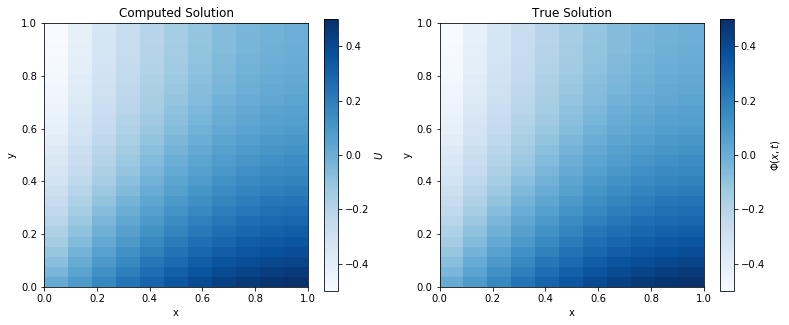

In [177]:
# Grid including boundaries
# Note that the x and y arrays include the boundary location
m = 10
n = 25
delta_x = 1.0 / (m + 1)
delta_y = 1.0 / (n + 1)
x = numpy.linspace(0.0, 1.0, m + 2)
y = numpy.linspace(0.0, 1.0, n + 2)
X, Y = numpy.meshgrid(x, y)
# Transpose these so that the coordinates match up to (i, j)
X = X.transpose()
Y = Y.transpose()

f = lambda x, y: 0.0 * x + 0.0 * y 
u_true = lambda x, y: soln_true(x, y, N = 100)

U = solve_laplace(X, Y, f)
print("Error: ",numpy.linalg.norm(max(delta_x, delta_y) * (u_true(X, Y).real - U), ord=1))


fig = plt.figure(figsize = (13,5))
fig.set_figwidth(fig.get_figwidth())
axes = fig.add_subplot(1, 2, 1, aspect='equal')
plot = axes.pcolor(X, Y, U, vmax=0.5, vmin=-0.5, cmap=plt.get_cmap("Blues"))
fig.colorbar(plot, label="$U$")
axes.set_title("Computed Solution")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes = fig.add_subplot(1, 2, 2, aspect='equal')
plot = axes.pcolor(X, Y, u_true(X, Y).real, vmax=0.5, vmin=-0.5, cmap=plt.get_cmap("Blues"))
fig.colorbar(plot, label="$\Phi(x,t)$")
axes.set_title("True Solution")
axes.set_xlabel("x")
axes.set_ylabel("y")

plt.show()

Let's see convergence when $\Delta x \rightarrow 0$ and $\Delta y\rightarrow 0$:

/Users/jwprk555/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:64: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/jwprk555/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:65: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/jwprk555/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:66: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/jwprk555/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:67: ComplexWarning: Casting complex values to real discards the imaginary part


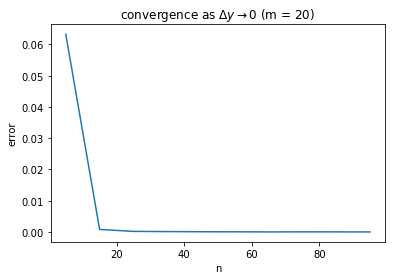

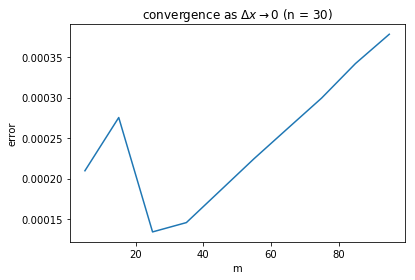

In [178]:
def behavior_solve_laplace(m,n,f):
    x = numpy.linspace(0.0, 1.0, m + 2)
    y = numpy.linspace(0.0, 1.0, n + 2)
    delta_x = 1.0/(m+1)
    delta_y = 1.0/(n+1)
    X, Y = numpy.meshgrid(x, y)

    # Transpose these so that the coordinates match up to (i, j)
    X = X.transpose()
    Y = Y.transpose()

    U = solve_laplace(X,Y,f)
    u_true = lambda x, y: soln_true(x, y, N = 100)
    error = numpy.linalg.norm(max(delta_x, delta_y) * (u_true(X, Y) - U), ord=1)
    
    return error

error_array_y = []

m = 20

for n in range(5,100,10):
    error = behavior_solve_laplace(m,n,f)
    error_array_y.append(error)


fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(range(5,100,10), error_array_y)
axes.set_title(r"convergence as $\Delta y \rightarrow 0$ (m = 20)")
axes.set_xlabel("n")
axes.set_ylabel("error")
plt.show()

error_array_x = []

n = 30

for m in range(5,100,10):
    error = behavior_solve_laplace(m,n,f)
    error_array_x.append(error)


fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(range(5,100,10), error_array_x)
axes.set_title(r"convergence as $\Delta x \rightarrow 0$ (n = 30)" )
axes.set_xlabel("m")
axes.set_ylabel("error")
plt.show()


It doesn't help reducing the error when $\Delta x$ and $\Delta y$ become smaller after around $m = n =20$.

## Method 2: Solve Neumann boundary problem


Now, Neumann boundary conditions have to be discretized and be taken into account.

- at $(y = 0)$
$$\frac{\partial {\Phi}}{\partial y} = \frac{2{\Phi}}{Z} = \frac{\Phi_{i,1} - \Phi_{i,0}}{\Delta y}$$


- at $(y = 1)$ 
$$\frac{\partial {\Phi}}{\partial y} = 0 = \frac{\Phi_{i,n} - \Phi_{i,n-1}}{\Delta y}$$

- at $(x = 0)$
$$\frac{\partial {\Phi}}{\partial x} = 1 = \frac{\Phi_{1,j} - \Phi_{0,j}}{\Delta x}$$

- at $(x = 1)$
$$\frac{\partial {\Phi}}{\partial x} = 0 = \frac{\Phi_{m,j} - \Phi_{m-1,j}}{\Delta x}$$


The new matrix $A$ that encode the above Neumann boundary condition is
$$
    A =  \begin{bmatrix}
        I' &  \\
        I2 & T' & I2 \\
          & I2 & T' & I2 \\
          &   & \ddots & \ddots & \ddots \\
          &   &        & I2 & T' & I2 \\
          &   &        &   &  & I''
    \end{bmatrix}
$$
where the matrix $T'$ is
$$
    T' = \begin{bmatrix}
        \frac{1}{\Delta_x} & -\frac{1}{\Delta_x} \\
        \frac{1}{\Delta x^2} & -2 \left( \frac{1}{\Delta x^2} + \frac{1}{\Delta y^2} \right) &\frac{1}{\Delta x^2} \\
          & \frac{1}{\Delta x^2} & -2 \left( \frac{1}{\Delta x^2} + \frac{1}{\Delta y^2} \right) & \frac{1}{\Delta x^2} \\
          &   & \ddots & \ddots & \ddots \\
          &   &        & \frac{1}{\Delta x^2} & -2 \left( \frac{1}{\Delta x^2} + \frac{1}{\Delta y^2} \right) & \frac{1}{\Delta x^2} \\
          &   &        &   &  -\frac{1}{\Delta x}& \frac{1}{\Delta x}
    \end{bmatrix}
$$

$I'$ is

$$
    I' = \begin{bmatrix}
        \frac{1}{\Delta y} - \frac{2}{Z(x)} & -\frac{1}{\Delta y}  \\
         & \frac{1}{\Delta y} - \frac{2}{Z(x)} & -\frac{1}{\Delta y} \\
          &  & \frac{1}{\Delta y} - \frac{2}{Z(x)}& -\frac{1}{\Delta y} \\
          &   & \ddots & \ddots & \ddots \\
          &   &        &  & \frac{1}{\Delta y} - \frac{2}{Z(x)} & -\frac{1}{\Delta y} \\
          &   &        &   & -\frac{1}{\Delta y} & \frac{1}{\Delta y} - \frac{2}{Z(x)} 
    \end{bmatrix}
$$

and $I''$ is


$$
    I'' = \begin{bmatrix}
        \frac{1}{\Delta y} & -\frac{1}{\Delta y}  \\
         & \frac{1}{\Delta y} & -\frac{1}{\Delta y} \\
          &  & \frac{1}{\Delta y} & -\frac{1}{\Delta y} \\
          &   & \ddots & \ddots & \ddots \\
          &   &        &  & \frac{1}{\Delta y} & -\frac{1}{\Delta y}\\
          &   &        &   & -\frac{1}{\Delta y} & \frac{1}{\Delta y} 
    \end{bmatrix}
$$

The first and last rows of $T'$ corresponds to the Neumann boundary conditions for $x=0$ and $x=1$, and $I'$ corresponds to the Neumann boundary conditions for $y=0$, $I''$ for $y=1$.

In [183]:
# Numerical Solution
import scipy.sparse as sparse
import scipy.sparse.linalg as linalg

def solve_laplace_2(X, Y, f):
    delta_x = X[1][0] - X[0][0]
    delta_y = Y[0][1] - Y[0][0]
    
    m = numpy.shape(X)[0] - 2
    n = numpy.shape(X)[1] - 2

    x = numpy.linspace(0.0, 1.0, m + 2)
    y = numpy.linspace(0.0, 1.0, n + 2)
    
    u_true = lambda x, y: soln_true(x, y, N = 100)


    # Construct A 

    e03 = numpy.ones(m+2)
    e03[-2] = 1.0/(1.0/delta_x**2) * (-1.0/delta_x)
    e04 = numpy.ones(m+2)
    e04[1] = 1.0/(1.0/(delta_x**2))*(-1.0/delta_x)
    e1 = numpy.ones(m+2)
    e1[0] = 1.0 /(-2.0 *(1.0/(delta_x**2) +1.0/(delta_y**2)))*1.0 / delta_x
    e1[-1] = 1.0 / (-2.0 *(1.0/(delta_x**2) +1.0/(delta_y**2)))*1.0 / delta_x
    T = sparse.spdiags([e03 *(1.0/(delta_x**2)), -2.0 *(1.0/(delta_x**2) +1.0/(delta_y**2)) * e1,
                        e04*(1.0/(delta_x**2))], [-1, 0, 1], m+2, m+2)


    e2 = numpy.ones(m+2)
    e2[0] = 0.0
    e2[-1] = 0.0
    I2 = sparse.spdiags([e2 *(1.0/(delta_y**2))],[0], m+2, m+2)


    e3 = numpy.ones(n+2)
    e3[-2] = 0.0
    e4 = numpy.ones(n+2)
    e4[1] = 0.0
    S = sparse.spdiags([e3, e4], [-1, 1], n+2, n+2)


    e5 = numpy.ones(n+2)
    e5[0] = 0.0
    e5[-1] = 0.0
    I = sparse.spdiags([e5],[0], n+2, n+2)

    e6 = numpy.ones(n+2)
    e6[1:] = 0.0
    I_edge = sparse.spdiags([e6],[0], n+2, n+2) # this will make I'
    
    e6_2 = numpy.ones(n+2)
    e6_2[:-1] = 0.0
    I_edge_2 = sparse.spdiags([e6_2],[0], n+2, n+2) # this will make I''
    
    e7 = numpy.ones(m+2)
    e8 = numpy.zeros(m+2)
    e8[-2] = -1.0/delta_y
    first_derv = sparse.spdiags([e8, e7*(1.0/delta_y) - 2.0/(Z(x[:m+2])).real, -e7*(1.0/delta_y)],[-1, 0, 1], m+2, m+2)


    A = sparse.kron(I, T) + sparse.kron(I_edge, first_derv) +sparse.kron(I_edge_2, sparse.eye(m+2)) + sparse.kron(S, I2)

#     dataframe = pd.DataFrame(A.toarray())
#     display(dataframe)


    # Solve
    U = numpy.zeros(numpy.shape(X))


    f0 = f(X,Y)

    f1 = f0.reshape(((m+2)*(n+2)), order='F')

    # Put neumann boundary values in right hand side
    f1[0: (m+2)] =  numpy.zeros(m+2) # at y=0
    f1[-(m+2):] = numpy.zeros(m+2) # at y=1
    for i in range(1, n+2): 
        f1[(m+2)*i ] = 1.0  # at x=0
        f1[(m+2)*i + (m+1)] = 0.0 # at x=1

    U = linalg.spsolve(A, f1).reshape((m+2,n+2), order='F')

   

    return U

Error:  0.35654419737677495


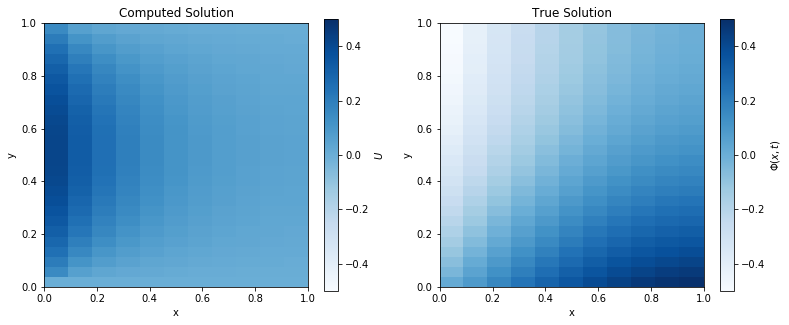

In [184]:
# Grid including boundaries
# Note that the x and y arrays include the boundary location
m = 10
n = 25
delta_x = 1.0 / (m + 1)
delta_y = 1.0 / (n + 1)
x = numpy.linspace(0.0, 1.0, m + 2)
y = numpy.linspace(0.0, 1.0, n + 2)
X, Y = numpy.meshgrid(x, y)
# Transpose these so that the coordinates match up to (i, j)
X = X.transpose()
Y = Y.transpose()

f = lambda x, y: 0.0 * x + 0.0 * y 
u_true = lambda x, y: soln_true(x, y, N = 200)

U = solve_laplace_2(X, Y, f)
print("Error: ",numpy.linalg.norm(max(delta_x, delta_y) * (u_true(X, Y).real - U), ord=1))


fig = plt.figure(figsize = (13,5))
fig.set_figwidth(fig.get_figwidth())
axes = fig.add_subplot(1, 2, 1, aspect='equal')
plot = axes.pcolor(X, Y, U, vmax=0.5, vmin=-0.5, cmap=plt.get_cmap("Blues"))
fig.colorbar(plot, label="$U$")
axes.set_title("Computed Solution")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes = fig.add_subplot(1, 2, 2, aspect='equal')
plot = axes.pcolor(X, Y, u_true(X, Y).real, vmax=0.5, vmin=-0.5, cmap=plt.get_cmap("Blues"))
fig.colorbar(plot, label="$\Phi(x,t)$")
axes.set_title("True Solution")
axes.set_xlabel("x")
axes.set_ylabel("y")

plt.show()

The error is quite significant compared to the first method with Dirichlet Boundary. Let's examine the error convergence by varying $\Delta x$ and $\Delta y$.

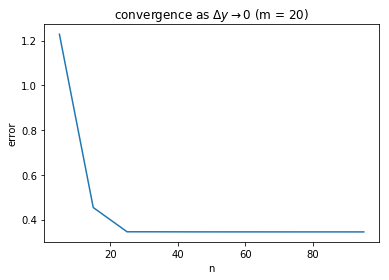

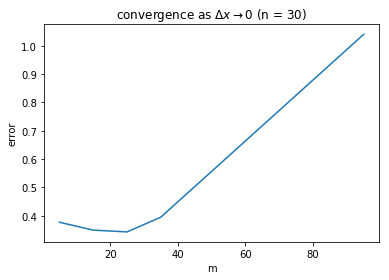

In [185]:
def behavior_solve_laplace_2(m,n,f):
    x = numpy.linspace(0.0, 1.0, m + 2)
    y = numpy.linspace(0.0, 1.0, n + 2)
    delta_x = 1.0/(m+1)
    delta_y = 1.0/(n+1)
    X, Y = numpy.meshgrid(x, y)

    # Transpose these so that the coordinates match up to (i, j)
    X = X.transpose()
    Y = Y.transpose()

    U = solve_laplace_2(X,Y,f)
    u_true = lambda x, y: soln_true(x, y, N = 100)
    error = numpy.linalg.norm(max(delta_x, delta_y) * (u_true(X, Y) - U), ord=1)
    
    return error

error_array_y = []

m = 20

for n in range(5,100,10):
    error = behavior_solve_laplace_2(m,n,f)
    error_array_y.append(error)


fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(range(5,100,10), error_array_y)
axes.set_title(r"convergence as $\Delta y \rightarrow 0$ (m = 20)")
axes.set_xlabel("n")
axes.set_ylabel("error")
plt.show()

error_array_x = []

n = 30

for m in range(5,100,10):
    error = behavior_solve_laplace_2(m,n,f)
    error_array_x.append(error)


fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(range(5,100,10), error_array_x)
axes.set_title(r"convergence as $\Delta x \rightarrow 0$ (n = 30)" )
axes.set_xlabel("m")
axes.set_ylabel("error")
plt.show()


The error convergence plot looks very similar to the plot for method 1 with Dirichlet boundary conditions. For both caes, tuning the $y$ direction narrower helps reducing the error, while doing so on the $x$ direction makes the error larger.

## Final Remarks

In Fall 2016, I studied the mathematical modeling of hearing and biology of it for Senior Seminar class. Back then, it was before taking Principles of Applied Mathematics, Numerical Methods for PDE, and Research Seminar. I remember that when I researched on the existing literature, I had trouble interpreting the models and making connections to the physiology of hearing. After four semesters of more math courses, I am glad to make improvements from simple literature review and apply the finite differences method to the constructed PDE model of inner ear, and compare it to the analytical solution by FFT approach provided during the literature review. 


Thank you for all your teachings at Columbia!!


## References

[1] **Lesser, M. B. and D. A. Berkley**. (1972). *Fluid Mechanics of the Cochlea*. Part I., Journal of Fluid Mechanics. 51: 497–512.

[2] **Keener JP, Sneyd J**. *Mathematical Physiology, chapter 23*. Springer-Verlag, 1998.

[3] **Purves, Dale**. *Neuroscience: 3rd Edition*. Sunderland, MA: Sinauer, 2004. 

[4] **Strauss, Walter A**. *Partial Differential Equations: An Introduction*. New York: Wiley, 2008. 

[5] **Bekesy, Georg Von.** (1961) *Concerning the pleasures of observing, and the mechanics of the inner ear*. Nobel Prize Lecture 

[6] **Viergever. M.A.** (1980). *Mechanics of the Inner Ear - A mathematical approach*. Doctoral dissertation. Delft University Press, Delft, The Netherlands.

[7] **Boer, Egbert De.** *Mechanics of the Cochlea: Modeling Efforts, The Cochlea*. Ed. Peter Dallos, Ed. Richard R Fay. New York: Springer, 1996. Print

[8] Fluids – Lecture 6 Notes, MIT. http://web.mit.edu/16.unified/www/FALL/fluids/Lectures/f06.pdf (lecture note on Fluid Dynamics)

[9] **Mandli, Kyle.** *Elliptic Equations* https://github.com/mandli/numerical-methods-pdes/blob/master/05_elliptic.ipynb